# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
 

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')

analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/corygraciano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='6f0197cfcbae44b09d335612aff36f69')




In [4]:
# Read your api key environment variable
# YOUR CODE HERE
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

Python-dotenv could not parse statement starting at line 1


In [5]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient

In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
) 

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head() 

,text,Compound,Positive,Negative,Neutral
0,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
3,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
4,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000


In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.050560,0.062550,0.037900,0.899550
std,0.376771,0.061657,0.043444,0.063682
min,-0.440400,0.000000,0.000000,0.765000
25%,-0.331550,0.000000,0.000000,0.866250
50%,0.038600,0.054000,0.000000,0.914500
75%,0.328950,0.106750,0.083250,0.934000
max,0.680800,0.185000,0.101000,1.000000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.155615,0.065200,0.019000,0.915800
std,0.322773,0.063741,0.044849,0.079075
min,-0.680800,0.000000,0.000000,0.775000
25%,0.000000,0.000000,0.000000,0.875500
50%,0.089950,0.051500,0.000000,0.927000
75%,0.406800,0.106000,0.000000,1.000000
max,0.757900,0.217000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/corygraciano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
wnl = WordNetLemmatizer() 
# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,"[Denis, Rusinovich, set, cryptocurrency, minin..."
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[El, Salvador, introduced, Bitcoin, legal, ten..."
2,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, Bitcoin, mining, ..."
3,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[Israeli, national, Tal, Prihar, pled, guilty,..."
4,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, 4,836, ETH, 4..."


In [16]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, 4,836, ETH, 4..."
1,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"[Hackers, made, roughly, 15, million, ethereum..."
2,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[level, new, mayor, simply, employing, age-old..."
3,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"[Back, September, Robinhood, announced, plan, ..."
4,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877,"[Trading, platform, Crypto.com, lost, 34, mill..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('mining', 'system'), 4),
 (('El', 'Salvador'), 3),
 (('Illustration', 'Alex'), 3),
 (('Alex', 'Castro'), 3),
 (('Castro', 'Verge'), 3),
 (('building', 'open'), 3),
 (('blog', 'post'), 3),
 (('alongside', 'US'), 2),
 (('US', 'dollar'), 2),
 (('International', 'Monetary'), 2),
 (('Monetary', 'Fund'), 2),
 (('officially', 'building'), 2),
 (('open', 'Bitcoin'), 2),
 (('Bitcoin', 'mining'), 2),
 (('Raedle/Getty', 'Images'), 2),
 (('Images', 'Block'), 2),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('Jack', 'Dorsey'), 2)]

In [19]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('324', 'million'), 4),
 (('blog', 'post'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('according', 'new'), 2),
 (('New', 'York'), 2),
 (('York', 'City'), 2),
 (('char', 'BELIEVERS'), 2),
 (('BELIEVERS', 'OPEN'), 2),
 (('OPEN', 'public'), 2),
 (('public', 'blockchains'), 2),
 (('blockchains', 'provide'), 2),
 (('provide', 'second'), 2),
 (('second', 'chance'), 2),
 (('chance', 'building'), 2),
 (('building', 'digital'), 2),
 (('digital', 'economy'), 2),
 (('economy', 'fact'), 2),
 (('fact', 'application'), 2)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 10),
 ('company', 8),
 ('cryptocurrency', 7),
 ('mining', 7),
 ('new', 6),
 ('open', 5),
 ('bitcoin', 5),
 ('El', 4),
 ('building', 4)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('cryptocurrency', 7),
 ('million', 6),
 ('Ethereum', 6),
 ('new', 5),
 ('company', 4),
 ('digital', 4),
 ('blockchains', 4),
 ('324', 4),
 ('blog', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

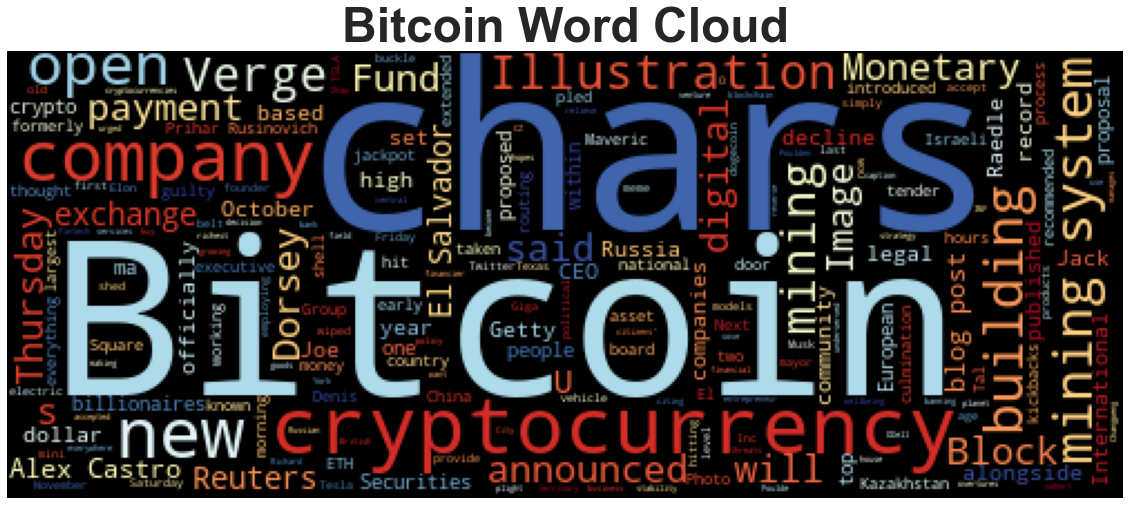

In [25]:
 wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

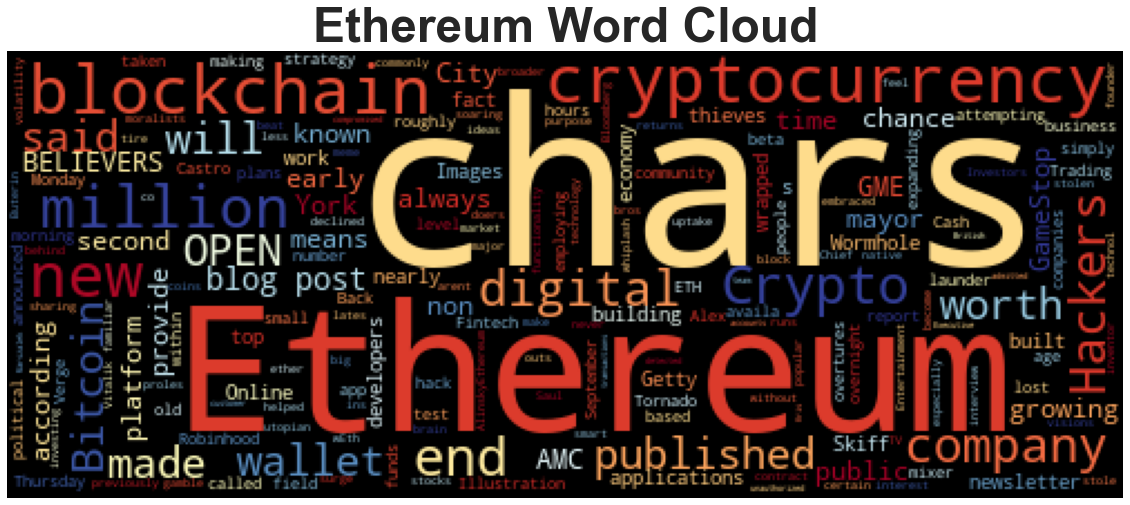

In [26]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [31]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 16.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [42]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc.text.str.cat()
all_btc_text

'When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars]El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars]Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars]In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a b

In [43]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_btc_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Bitcoin NER"

In [44]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [45]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
chars]El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
chars]Russia GPE
Thursday DATE
Russian NORP
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Changpeng PERSON
Binance PERSON
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Thursday DAT

---

### Ethereum NER

In [46]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = eth.text.str.cat()
all_eth_text

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum mixer, known as Tornado Cash, according to a new report from… [+3891 chars]On some level, the new mayor is simply employing an age-old political strategy: making overtures to the business community. Fintech is a growing field in New York City, and blockchain-based companies… [+1562 chars]Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availa… [+1069 chars]Trading platform Crypto.com lost about $34 million worth of cryptocurrency in a hack on Monday, according to a new blog post by the compa

In [47]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(all_eth_text)
# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [48]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent', jupyter=True)

In [49]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash PERSON
Fintech ORG
New York City GPE
September DATE
Robinhood ORG
Crypto.com ORG
about $34 million MONEY
Monday DATE
Ethereum ORG
Ethereum GPE
418% PERCENT
2021 DATE
AMC Entertainment ORG
AMC ORG
GME ORG
Ethereums ORG
more than 650% PERCENT
Vitalik Buterin PERSON
Ethereum ORG
OPEN ORG
second ORDINAL
OPEN ORG
second ORDINAL
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
chars]In PERSON
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
TIME ORG
weekly DATE
Vita ORG
chars]New York City GPE
Eric Adams PERSON
first ORDINAL
Friday DATE
Bitcoin and Ethereum ORG
Coinbase Global Inc. ORG
U

---